# Pandas 入门

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
obj = Series([4, 7, -5, 3])

In [4]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
obj2 = Series([4, 7 , -5, 3], index =['d', 'b', 'a', 'c'])

In [8]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index([u'd', u'b', u'a', u'c'], dtype='object')

In [10]:
obj2['a']

-5

In [13]:
obj2['d'] = 6

In [14]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [17]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [19]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [20]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [22]:
%pylab inline
np.exp(obj2)

Populating the interactive namespace from numpy and matplotlib


d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [24]:
# 可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射
# 它可以用在许多需要字典参数的函数中
'b' in obj2

True

In [25]:
'e' in obj2

False

In [26]:
# 也可以通过Python字典来创建Series
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}

In [31]:
obj3 = Series(sdata)

In [32]:
obj3                   # 可以发现字典的键是排序过的

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [29]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [33]:
obj4 = Series(sdata, index=states)

In [34]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [35]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [36]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [37]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [38]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [39]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [40]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [42]:
obj4.name = 'population'

In [43]:
obj4.index.name = 'state'

In [44]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [46]:
# Series的索引可以通过赋值的方式就地修改
obj.index = ['Bob', 'Steve', 'Jeff','Ryan','GG']

In [47]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
GG       6
dtype: int64

### DataFrame

In [49]:
# 既有行索引，也有列索引，可以看做是由Series组成的字典（共用同一个索引）
# 每一列格式相同, 类似Excel表格
data = {'state':['Ohio','Ohio', "ohio", 'Nevada', 'Nevada'], 'year':[2000, 2001, 2002, 2001, 2002], 'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}

In [50]:
frame = DataFrame(data)

In [51]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [52]:
# 如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列：
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [53]:
# 如果传入的列在数据中找不到，就会产生NA值：
frame2 = DataFrame(data, columns = ['year', 'state', 'pop', 'debt'], index=['one','two','three','four','five'])

In [54]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [55]:
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [56]:
frame2['state']      # 字典方式

one        Ohio
two        Ohio
three      ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [57]:
frame2.year         # 属性方式

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [58]:
frame2.ix['three']

year     2002
state    ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [59]:
frame2['debt'] = 16.5

In [60]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [61]:
frame2['debt'] = np.arange(5.)

In [62]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [63]:
# 将列表或数组赋值给某个列时， 其长度必须跟DataFrame的长度相匹配。
# 如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都会被填上缺失值
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [64]:
frame2['debt'] = val

In [65]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [66]:
# 为不存在的列赋值会创建出一个新列
# 关键字del用于删除列
frame2['eastern'] = frame2.state =='Ohio'

In [67]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,ohio,3.6,NaN,False
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [69]:
del frame2['eastern']

In [74]:
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [75]:
# 嵌套字典传给DataFrame会被解释为： 外层字典的键作为列，内层键作为行索引
pop = {'Nevada':{2001:2.4, 2002:2.9}, 'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = DataFrame(pop)

In [76]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [77]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [78]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [79]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [80]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [81]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [82]:
frame2.values

array([[2000L, 'Ohio', 1.5, nan],
       [2001L, 'Ohio', 1.7, -1.2],
       [2002L, 'ohio', 3.6, nan],
       [2001L, 'Nevada', 2.4, -1.5],
       [2002L, 'Nevada', 2.9, -1.7]], dtype=object)

### 索引对象

In [2]:
from pandas import DataFrame, Series
import pandas as pd
obj = Series(range(3), index=['a', 'b', 'c'])

In [3]:
index = obj.index

In [4]:
index

Index([u'a', u'b', u'c'], dtype='object')

In [5]:
index[1:]

Index([u'b', u'c'], dtype='object')

In [6]:
index[1] = 's'           # Index对象是不可修改的，这保证Index对象在多个数据结构之间安全共享

TypeError: Index does not support mutable operations

In [8]:
%pylab inline
index = pd.Index(np.arange(3))

Populating the interactive namespace from numpy and matplotlib


In [9]:
obj2 = Series([1.5, -2.5, 0], index=index)

In [10]:
obj2.index is index

True

In [11]:
index

Int64Index([0, 1, 2], dtype='int64')

In [12]:
frame3

NameError: name 'frame3' is not defined

### 基本功能

In [13]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [15]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [16]:
# reindex方法作用是创建一个适合新索引的新对象，会根据新索引进行重排，不存在的就引入缺失值
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [17]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [18]:
obj.reindex(['a', 'b', 'c','d','e'], fill_value=0) # 不存在的用0填充

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [20]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [21]:
obj3.reindex(range(6), method='ffill')  
# ffill（或pad） 前向填充值
# bfill（或backfill） 后向填充值

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [22]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])

In [23]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [24]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [25]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [26]:
# 使用columns关键字即可重新索引列
states = ['Texas', 'Utah', 'California']

In [27]:
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [28]:
# 也可以同时对行和列进行重新索引， 而插值则只能按行应用（即轴0）
frame.reindex(index=['a','b','c','d'], method='ffill', columns=states)

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [29]:
frame.ix[['a', 'b', 'c', 'd'], states] # ix 标签索引功能

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### 丢弃指定轴上的项

In [30]:
# drop方法返回的是一个在指定轴上删除了指定值的新对象
obj = Series(np.arange(5.), index=['a','b','c','d','e'])

In [31]:
new_obj = obj.drop('c')

In [32]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [33]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [34]:
# 对月DataFrame,可以删除任意轴上的索引值
data = DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])

In [35]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [36]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [38]:
data.drop('two')   # 在删除轴时，默认的是删除行级轴，即axis=0，如果需要删除列级轴，需要指定axis=1，否则会报错

ValueError: labels ['two'] not contained in axis

In [39]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### 索引选取和过滤

In [40]:
# Series的索引不只是整数
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [41]:
obj['b']

1.0

In [42]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [43]:
obj[1:3]

b    1.0
c    2.0
dtype: float64

In [44]:
obj[1]

1.0

In [45]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [46]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [47]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

In [48]:
# 利用标签的切片和普通的Python切片不同，其末端是包含的，即封闭区间
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [49]:
obj['b':'c'] =5

In [50]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [51]:
data = DataFrame(np.arange(16).reshape((4,4)), index=['Ohio','Colorado','Utah','New York'], columns=['one', 'two', 'three','four'])

In [52]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [53]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [54]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [55]:
data[:2]     # 默认按行

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [56]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [57]:
data <5 

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [59]:
data[data < 5] = 0

In [60]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [61]:
data.ix['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [62]:
data.ix[['Colorada', 'Utah'], [3, 0, 1]]

,four,one,two
Colorada,NaN,NaN,NaN
Utah,11.0,8.0,9.0


In [63]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [64]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### 算数运算和数据对齐

In [65]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [67]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [68]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [69]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [70]:
s1 + s2        # 不存在的补缺失值，即不重叠的索引处

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

### 在算数方法中填充值

In [72]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

In [74]:
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [76]:
df1 + df2       # 相加的时候，没有重叠的位置就会产生NA值

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [78]:
df1.add(df2, fill_value=0)                   # 不重叠的地方填充为0再相加

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [79]:
# add 加法
# sub 减法
# div 除法
# mul 乘法

### DataFrame和Series之间的运算

In [80]:
arr = np.arange(12.).reshape((3, 4))

In [81]:
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [82]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [83]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [84]:
# 上面的运算发现所有行都参与了运算，这就叫广播

In [86]:
frame = DataFrame(np.arange(12.).reshape((4,3)), columns=list('bde'), index=['Utah','Ohio','Texas','Oregon'])

In [87]:
series = frame.ix[0]

In [88]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [89]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [90]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [91]:
# 如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集

In [92]:
series2 = Series(range(3), index=['b','e','f'])

In [93]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [94]:
# 如果希望匹配行并且在列上广播，则必须使用算数运算方法
series3 = frame['d']

In [95]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [96]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [98]:
frame - series3           # 不是想要的结果

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


 ###  函数应用和映射

In [100]:
frame = DataFrame(np.random.randn(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregn'])

In [101]:
frame

,b,d,e
Utah,0.660693,0.924965,-0.517874
Ohio,0.511371,0.560353,-0.060667
Texas,-1.213039,1.269587,-0.205587
Oregn,1.052982,0.947513,0.427382


In [102]:
# 将函数应用到由各列或行形成的一维数组上，DataFrame的apply方法可以实现
f = lambda x: x.max() - x.min()

In [103]:
frame.apply(f)

b    2.266021
d    0.709235
e    0.945256
dtype: float64

In [105]:
frame.apply(f, axis=1)

Utah     1.442839
Ohio     0.621019
Texas    2.482627
Oregn    0.625599
dtype: float64

In [107]:
# 传递给apply的函数还可以返回由多个值组成的Series

In [108]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

In [109]:
frame.apply(f)

,b,d,e
min,-1.213039,0.560353,-0.517874
max,1.052982,1.269587,0.427382


In [110]:
format = lambda x: '%.2f' % x

In [111]:
frame.applymap(format)

,b,d,e
Utah,0.66,0.92,-0.52
Ohio,0.51,0.56,-0.06
Texas,-1.21,1.27,-0.21
Oregn,1.05,0.95,0.43


## Series有一个应用于元素级函数的map方法：

In [113]:
frame['e'].map(format)

Utah     -0.52
Ohio     -0.06
Texas    -0.21
Oregn     0.43
Name: e, dtype: object

### 排序和排名

In [114]:
obj = Series(range(4), index=['d','a','b','c'])

In [115]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [116]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [117]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['three', 'one'], columns=['d', 'a','b','c'])

In [118]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [119]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [120]:
frame.sort_index(1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [122]:
frame.sort_index(axis=1, ascending=False) # 默认是升序，也可以降序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [123]:
# 如果要按值对Series进行排序，可以使用order方法

In [124]:
obj = Series([4, 7, -3, 2])

In [125]:
obj.order()

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


2   -3
3    2
0    4
1    7
dtype: int64

In [126]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [127]:
# 在排序时，任何缺失值默认都会被放到Series的末尾：不论升序还是降序
obj = Series([4, np.nan, 7, np.nan, -3, 2])

In [128]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [129]:
obj.sort_values(ascending=False)

2    7.0
0    4.0
5    2.0
4   -3.0
1    NaN
3    NaN
dtype: float64

In [131]:
# 加入希望根据一个或多个列中的值进行排序，可以将一个或多个列的名字传递给by选项
frame = DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})

In [132]:
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [134]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [137]:
# 要根据多个列进行排序，传入名称的列表即可
frame.sort_values(by=['a','b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [141]:
obj = Series([7,-5,7,4,2,0,4])

In [139]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [142]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [143]:
obj.rank(method='first')    # 根据数据值在原数据中出现的顺序给出的排名

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [144]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [148]:
frame = DataFrame({'b':[4.3, 7, -3, 2], 'a':[0,1,0,1], 'c':[-2,5,8,-2.5]})

In [149]:
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [150]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### 带有重复值的轴索引

In [151]:
obj = Series(range(5), index=['a','a','b','b','c'])

In [152]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [153]:
obj['a']   # 返回的是一个Series

a    0
a    1
dtype: int64

In [154]:
obj.index.is_unique

False

In [155]:
obj['c']  # 返回的是一个标量

4

### 汇总和计算描述统计

In [156]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])

In [157]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [158]:
# 调用sum方法会返回一个含有列小计的Series
df.sum()

one    9.25
two   -5.80
dtype: float64

In [159]:
# 传入axis=1会按行进行求和运算
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [160]:
# NA值会被自动排除，除非整个切片（这里指的是行或列）都是NA，通过skipna选项可以禁用该功能
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [162]:
df.idxmax()           # 返回最大值的索引

one    b
two    d
dtype: object

In [164]:
df.cumsum()          # 累计求和

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [165]:
df.describe()         # 一次产生多个汇总统计

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [166]:
# 对于非数值型数据
obj = Series(['a', 'a', 'b', 'c'] * 4)

In [167]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

###  相关系数与协方差

In [168]:
import pandas.io.data as web

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pandas-dev/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

In [179]:
from pandas_datareader import data.web, wb

In [184]:
all_data = {}
# for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOD']:
#     all_data[ticker] = web.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')
goog=data.get_data_yahoo('GOOG','1/1/2000', '1/1/2010')

ConnectionError: HTTPConnectionPool(host='ichart.finance.yahoo.com', port=80): Max retries exceeded with url: /table.csv?a=0&ignore=.csv&s=GOOG&b=1&e=1&d=0&g=d&f=2010&c=2000 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000000000AD8F4E0>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed',))

### 唯一值、值计数以及成员资格

In [185]:
obj = Series(['c','a','d','a','a','b','b','c','c'])

In [186]:
uniques = obj.unique()

In [187]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [189]:
obj.value_counts() # 用于计算一个Series中各值出现的频率， 默认降序排列

c    3
a    3
b    2
d    1
dtype: int64

In [190]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
b    2
d    1
dtype: int64

In [191]:
mask = obj.isin(['b', 'c'])

In [192]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [193]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [194]:
data = DataFrame({'Qu1':[1,3,4,3,4],
                 'Qu2':[2,3,1,2,3],
                 'Qu3':[1,5,2,4,4]})

In [195]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [196]:
result = data.apply(pd.value_counts).fillna(0)

In [197]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


ImportError: cannot import name checked_add_with_arr

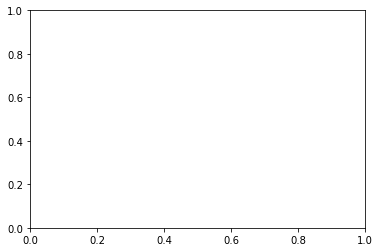

In [198]:
result.plot()

### 处理缺失数据

In [199]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [200]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [201]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [202]:
string_data[0] = None

In [203]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [204]:
from numpy import nan as NA

In [205]:
data = Series([1, NA, 3.5, NA, 7])

In [207]:
data.dropna()         # dropna返回一个仅含有非空数据和索引值的Series

0    1.0
2    3.5
4    7.0
dtype: float64

In [208]:
# 也可以通过布尔型索引达到这个目的
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [211]:
# 对于dropna默认丢弃任何含有缺失值的行
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])

In [212]:
clearned = data.dropna()

In [213]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [214]:
clearned

,0,1,2
0,1.0,6.5,3.0


In [216]:
# 传入how='all' 将只丢弃全为NA的那些行
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [217]:
# 要丢弃列，传入axis=1即可
data[4] = NA

In [218]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [219]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [220]:
df = DataFrame(np.random.randn(7,3))

In [221]:
df.ix[:4, 1] = NA

In [222]:
df.ix[:2, 2] = NA

In [223]:
df

,0,1,2
0,0.468938,NaN,NaN
1,-0.574777,NaN,NaN
2,0.057973,NaN,NaN
3,0.859926,NaN,1.074843
4,-0.020733,NaN,-1.178887
5,-1.162129,-0.036582,1.213036
6,0.822853,2.024454,0.242635


In [224]:
df.dropna(thresh=3)

,0,1,2
5,-1.162129,-0.036582,1.213036
6,0.822853,2.024454,0.242635


In [225]:
df.fillna(0)

,0,1,2
0,0.468938,0.000000,0.000000
1,-0.574777,0.000000,0.000000
2,0.057973,0.000000,0.000000
3,0.859926,0.000000,1.074843
4,-0.020733,0.000000,-1.178887
5,-1.162129,-0.036582,1.213036
6,0.822853,2.024454,0.242635


In [226]:
# 通过一个字典调用fillna，就可以实现对不同的列填充不同的值

In [228]:
df.fillna({1:.5, 2:-1})

,0,1,2
0,0.468938,0.500000,-1.000000
1,-0.574777,0.500000,-1.000000
2,0.057973,0.500000,-1.000000
3,0.859926,0.500000,1.074843
4,-0.020733,0.500000,-1.178887
5,-1.162129,-0.036582,1.213036
6,0.822853,2.024454,0.242635


In [229]:
# 总是返回被填充对象的引用
_ = df.fillna(0, inplace=True)

In [230]:
df

,0,1,2
0,0.468938,0.000000,0.000000
1,-0.574777,0.000000,0.000000
2,0.057973,0.000000,0.000000
3,0.859926,0.000000,1.074843
4,-0.020733,0.000000,-1.178887
5,-1.162129,-0.036582,1.213036
6,0.822853,2.024454,0.242635


In [231]:
df = DataFrame(np.random.randn(6,3))

In [232]:
df.ix[2:, 1]=NA

In [233]:
df.ix[4:,2]=NA

In [234]:
df

,0,1,2
0,-0.444955,-1.307936,0.511407
1,-1.049897,-1.690232,0.874046
2,-0.367843,NaN,0.985658
3,-2.605458,NaN,-2.877912
4,-0.005811,NaN,NaN
5,-1.110887,NaN,NaN


In [235]:
df.fillna(method='ffill')

,0,1,2
0,-0.444955,-1.307936,0.511407
1,-1.049897,-1.690232,0.874046
2,-0.367843,-1.690232,0.985658
3,-2.605458,-1.690232,-2.877912
4,-0.005811,-1.690232,-2.877912
5,-1.110887,-1.690232,-2.877912


In [236]:
df.fillna(method='ffill',limit=2)

,0,1,2
0,-0.444955,-1.307936,0.511407
1,-1.049897,-1.690232,0.874046
2,-0.367843,-1.690232,0.985658
3,-2.605458,-1.690232,-2.877912
4,-0.005811,NaN,-2.877912
5,-1.110887,NaN,-2.877912


In [237]:
# 传入Series的平均值或中位数
data = Series([1., NA, 3.5, NA, 7])

In [238]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

###  层次化索引

####  它能使在一个轴上拥有多个索引级别。抽象点说，它使你能以低维度形式处理高维度的数据

In [241]:
data = Series(np.random.randn(10), index=[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3]])

In [242]:
data

a  1   -0.383681
   2   -1.675589
   3   -1.672613
b  1   -0.348944
   2    0.894177
   3    0.560821
c  1   -0.344493
   2   -0.580832
d  2    0.290518
   3   -0.123844
dtype: float64

In [243]:
# 这就是带有MultiIndex索引的Series的格式化输出形式。索引之间的间隔表示直接使用上面的标签
data.index

MultiIndex(levels=[[u'a', u'b', u'c', u'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [244]:
data['b']

1   -0.348944
2    0.894177
3    0.560821
dtype: float64

In [245]:
data['b':'c']

b  1   -0.348944
   2    0.894177
   3    0.560821
c  1   -0.344493
   2   -0.580832
dtype: float64

In [246]:
data.ix[['b', 'd']]

b  1   -0.348944
   2    0.894177
   3    0.560821
d  2    0.290518
   3   -0.123844
dtype: float64

In [247]:
# 可以在内层中进行选取
data[:, 2]

a   -1.675589
b    0.894177
c   -0.580832
d    0.290518
dtype: float64

In [248]:
data.unstack()

,1,2,3
a,-0.383681,-1.675589,-1.672613
b,-0.348944,0.894177,0.560821
c,-0.344493,-0.580832,NaN
d,NaN,0.290518,-0.123844


In [249]:
data.unstack().stack()

a  1   -0.383681
   2   -1.675589
   3   -1.672613
b  1   -0.348944
   2    0.894177
   3    0.560821
c  1   -0.344493
   2   -0.580832
d  2    0.290518
   3   -0.123844
dtype: float64

In [250]:
# 对于DataFrame,每条轴都可以有分层索引

In [251]:
frame = DataFrame(np.arange(12).reshape((4,3)), index=[['a','a','b','b'], [1,2,1,2]],columns=[['Ohio','Ohio','Colorado'], ['Green', 'Red','Green']] )

In [252]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [253]:
frame.index.names=['key1','key2']

In [254]:
frame.columns.names= ['state','color']

In [255]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [257]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [260]:
from pandas import MultiIndex
data2 = MultiIndex.from_arrays([['Ohio','Ohio','Colorado'], ['Green','Red','Green']],names=['state','color'])

In [261]:
data2

MultiIndex(levels=[[u'Colorado', u'Ohio'], [u'Green', u'Red']],
           labels=[[1, 1, 0], [0, 1, 0]],
           names=[u'state', u'color'])

In [262]:
data2 = DataFrame(data2)

In [263]:
data2

,0
0,"(Ohio, Green)"
1,"(Ohio, Red)"
2,"(Colorado, Green)"


### 重排分级顺序

In [264]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [265]:
frame.sortlevel(1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [267]:
frame.swaplevel(0,1).sortlevel(0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 根据级别汇总统计

In [268]:
# 许多对DataFrame和Series的描述和汇总统计都有一个level选项，它用于指定在某条轴上求和的级别

In [271]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [272]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用DataFrame的列

In [275]:
# 将DataFrame的一个或多个列当作行索引来用，或者希望将行索引变成DataFrame的列
frame = DataFrame({'a': range(7), 'b':range(7,0,-1), 'c':['one','one','one','two','two','two','two'], 'd':[0,1,2,0,1,2,3]})

In [276]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [277]:
frame2 = frame.set_index(['c','d'])

In [278]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [280]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3